In [1]:
import random
import numpy as np
from PIL.GimpGradientFile import linear
from numpy.typing import NDArray
from typing import Optional
import plotly
import plotly.graph_objs as go
import plotly.express as px


In [3]:
import numpy as np
from numpy.typing import NDArray
from typing import Tuple, Callable
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.animation import FuncAnimation


def linear_model(x, m, c):
    return m * x + c


class LinearData:
    def __init__(self, m: float, b: float, sigma: float, size: int = 100):
        self.m = m
        self.b = b
        self.sigma = sigma
        self.size = size
        self.x = np.linspace(0, 100, size)
        self.y = self.generate_data()

    def generate_data(self) -> NDArray[np.float64]:
        return linear_model(self.x, self.m, self.b) + np.random.normal(0, self.sigma ** 2, self.size)

    def plot_data(self):
        plt.scatter(self.x, self.y, alpha=0.5)
        plt.plot(self.x, linear_model(self.x, self.m, self.b), 'r-', label='True Line')
        plt.legend()
        plt.show()






In [4]:
class RWMH:
    def __init__(self, prop_model: Callable, theta_0: NDArray[np.float64], proposed_sigma, sample_size: int, x: NDArray[np.float64], y: NDArray[np.float64]):
        self.model = prop_model
        self.theta: NDArray[np.float64] = np.array([theta_0])  # theta(m, b)
        self.sigma = proposed_sigma
        self.samples = sample_size
        self.iter = x
        self.data = y

    def log_likelihood(self, theta):
        m, c = theta[0], theta[1]
        # print(m, c)
        return np.sum(-1 / 2 * (((self.data - self.model(self.iter, m, c)) / self.sigma) ** 2))

    def proposal_ratio(self, theta_proposed, theta_current):
        # print("Norm of theta", np.linalg.norm(theta_proposed - theta_current))
        return self.log_likelihood(theta_proposed) - self.log_likelihood(theta_current)

    def sample(self):
        for i in range(self.samples):
            theta_proposed = np.random.normal(self.theta[-1], self.sigma ** 2, self.theta[-1].shape)
            alpha = min(self.proposal_ratio(theta_proposed, self.theta[-1]), 1)
            if np.log(np.random.random()) < alpha:
                self.theta = np.vstack([self.theta, theta_proposed])
            else:
                self.theta = np.vstack([self.theta, self.theta[-1]])
        return self.theta

    def plot_samples(self):
        plt.figure(figsize=(12, 6))
        plt.subplot(111)
        plt.plot(self.theta[:, 0], label='Slope')
        plt.legend()
        plt.title('Parameter Sample Path')
        
        plt.figure(figsize=(12, 6))
        plt.subplot(122)   
        plt.plot(self.theta[:, 1], label='Intercept')
        plt.legend()
        plt.title('Parameter Sample Path')
        
    def plot_error(self):
        plt.figure(figsize=(12, 6))
        iterations = range(len(self.theta))
        mean_theta = np.mean(self.theta, axis=0)
        plt.axhline(y=np.abs(l.m - mean_theta[0]), color='b', linestyle='--', label='Mean Slope Error')
        plt.axhline(y=np.abs(l.b - mean_theta[1]), color='r', linestyle='--', label='Mean Intercept Error')
        plt.plot(iterations, np.abs(l.m - self.theta[:, 0]), label='Slope Error', alpha=0.5)
        plt.plot(iterations, np.abs(l.b - self.theta[:, 1]), label='Intercept Error', alpha=0.5)
        plt.legend()
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error')
        plt.title('Absolute Error of Parameters')
    
    def distribution_plot(self):
        kde1 = stats.gaussian_kde(self.theta[:, 0])
        kde2 = stats.gaussian_kde(self.theta[:, 1])
        plt.figure(figsize=(8, 6))
        plt.plot( self.iter, kde1(self.iter), 'k-', label="slope")
        plt.plot(self.iter, kde2(self.iter), 'b-', label="intersect")
        plt.xlabel('x')
        plt.ylabel('Density')
        plt.title("Parameter distributions")
        plt.legend(loc=1)

    # TODO: Implement a method to sample the parameters in a step by step manner
    def sample_step(self):
            if len(self.theta) < self.samples:
                theta_proposed = np.random.normal(self.theta[-1], self.sigma ** 2, self.theta[-1].shape)
                alpha = min(self.proposal_ratio(theta_proposed, self.theta[-1]), 1)
                if np.log(np.random.random()) < alpha:
                    self.theta = np.vstack([self.theta, theta_proposed])
                else:
                    self.theta = np.vstack([self.theta, self.theta[-1]])
            return self.theta[-1]


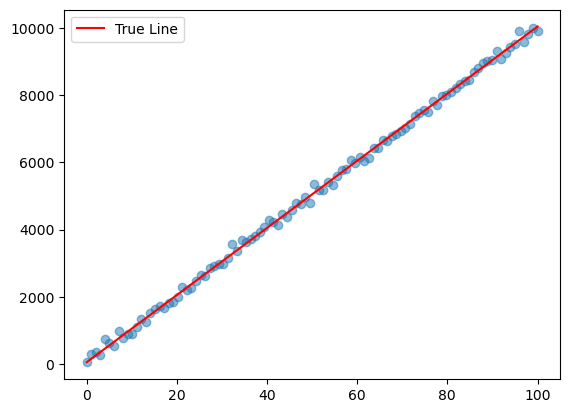

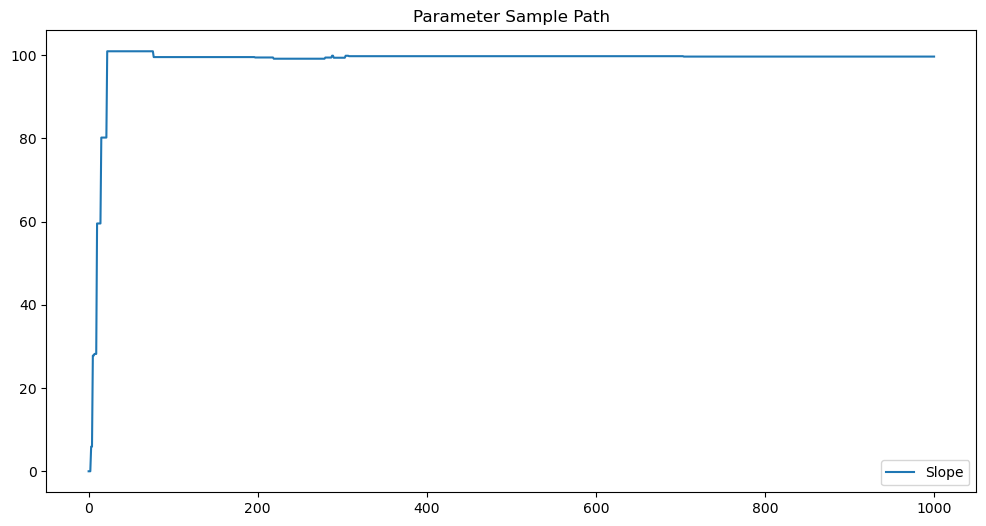

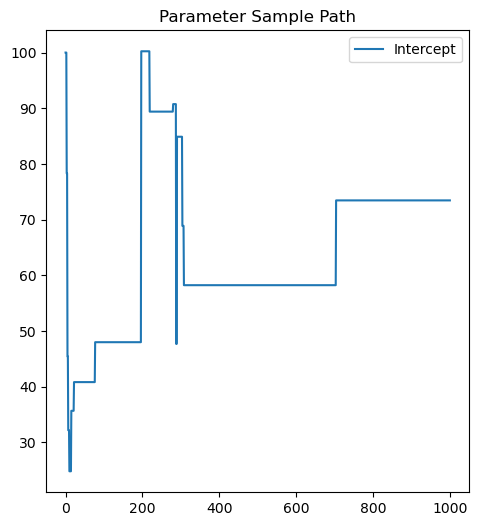

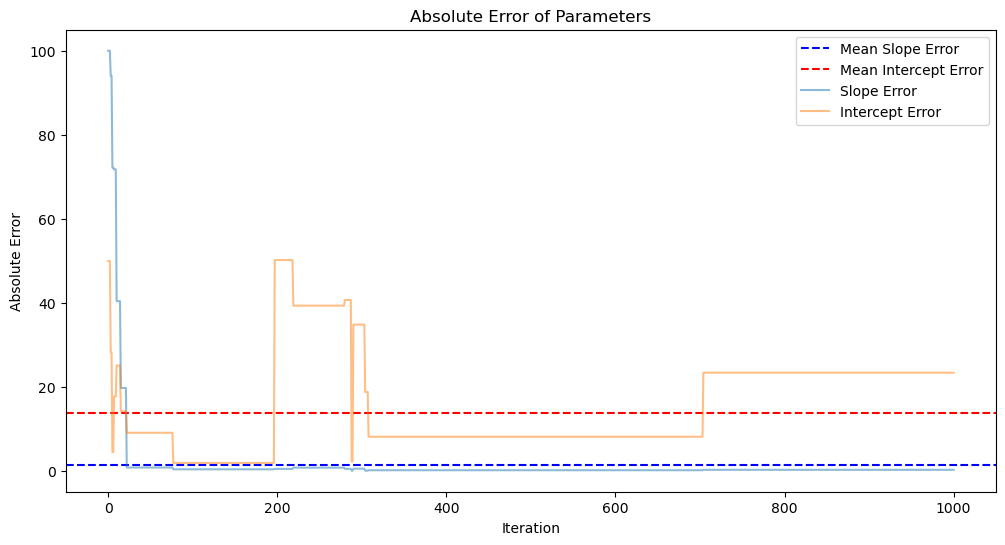

Estimated Parameters (m, c):  [99.63661085 73.45664875]
True parameters(m, c):  100 50


In [5]:
l = LinearData(100, 50, 10, 100)

l.generate_data()
l.plot_data()

r = RWMH(linear_model, np.array([0.0, 100.0]),5, 1000, l.x, l.y)
r.sample()
r.plot_samples()
r.plot_error()
plt.show()

print("Estimated Parameters (m, c): ", r.theta[-1, :])
print("True parameters(m, c): ", l.m, l.b)

In [13]:
r.distribution_plot()
plt.show()


NameError: name 'r' is not defined